In [2]:
%matplotlib inline
import math
import torch
import tools as tl

epoch 50, x1: -0.088751, x2: 0.100633


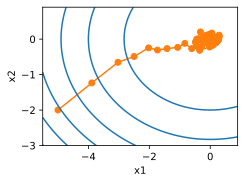

In [3]:
def f(x1, x2): # 目标函数
    return x1 ** 2 + 2 * x2 ** 2


def f_grad(x1, x2): # 目标函数的梯度
    return 2 * x1, 4 * x2


def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    # 模拟有噪声的梯度
    g1 += torch.normal(0.0, 1, (1,)).item()
    g2 += torch.normal(0.0, 1, (1,)).item()
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)


def constant_lr():
    return 1


eta = 0.1
lr = constant_lr 
tl.show_trace_2d(f, tl.train_2d(sgd, steps=50, f_grad=f_grad))

epoch 1000, x1: -0.735818, x2: -0.003096


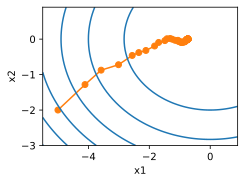

In [4]:
def exponential_lr():
    global t
    t += 1
    return math.exp(-0.1 * t)

t = 1
lr = exponential_lr
tl.show_trace_2d(f, tl.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.241368, x2: 0.113056


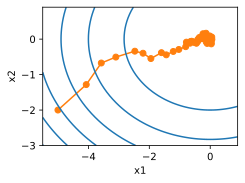

In [5]:
def polynomial_lr():
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

t = 1
lr = polynomial_lr
tl.show_trace_2d(f, tl.train_2d(sgd, steps=50, f_grad=f_grad))